<br></br>
<b><h2> Loading Python Libraries </h2></b>

In [2]:
# Let's import the required python packages for next day rain predict
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

<br></br>
<b><h2> Importing the Data </h2></b>

In [4]:
# Let's load the Health insurance data into a dataframe using pandas
data_frame = pd.read_csv("health_insurance.csv")

# Let's take a quick look at the shape of the dataframe
print("Health insurance data shape -->", data_frame.shape)
print()

# Let's take a brief look at the contents of the dataframe
data_frame.head(10)

Health insurance data shape --> (381109, 12)



,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


<br></br>
<h2><b> Gaining Insights from Data </b></h2>

In [5]:
# Let's obtain a brief overview of the dataframe
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
# Let's see descriptive statistics for all numeric columns
data_frame.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


<b><h3>Observations</h3></b>
1. <b> The majority of people in the dataset have an age that is centered or focused around 38</b>
2. <b> The values in the Driving_License column are less spread out or less dispersed from the mean </b> 
3. <b> Datapoints in Annual_Premium coulmn are more spread out or widely dispersed from the mean (average) of the values.</b>
4. <b> The Annual_Premium readings are clustered or concentrated around the value of 30000. </b>

In [7]:
# Let's see descriptive statistics for all object columns
data_frame.describe(include=object)

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


<b><h3>Observations</h3></b>
1. <b>The "Vehicle_Age" column contains 3 distinct values, whereas the combined "Gender" and "Vehicle_Damage" columns only have 2 distinct values.</b>
2. <b>"Gender" column is not continuous and has two distinct categories: "Male" and "Female" The number of occurrences for each category is "206089" and "175020" respectively.</b>
3. <b> "Vehicle_Age" column is not continuous and has three distinct categories: "Less than 1 Year", "Greater than 2 Years", and "1-2 Year". The number of occurrences for each category is "164786", "16007", and "200316" respectively.</b>
4. <b> "Vehicle_Damage" column is not continuous and has two distinct categories: "Yes" and "No". The number of occurrences for each category is "192413" and "188696" respectively.</b>

In [8]:
# Function to get unique_counts based on specific column
def value_counts(column_name):
    return data_frame.loc[
        :, column_name
    ].value_counts()  # Returns the unique value counts

In [9]:
# Iterates over all the columns of the dataframe and calls value_counts func
required_columns = [
    "Gender",
    "Driving_License",
    "Previously_Insured",
    "Vehicle_Age",
    "Vehicle_Damage",
    "Response",
]
for column_name in required_columns:
    print(f"Value Counts of {column_name}", sep="\n")
    print(value_counts(column_name=column_name))
    print()

Value Counts of Gender
Male      206089
Female    175020
Name: Gender, dtype: int64

Value Counts of Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64

Value Counts of Previously_Insured
0    206481
1    174628
Name: Previously_Insured, dtype: int64

Value Counts of Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Value Counts of Vehicle_Damage
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

Value Counts of Response
0    334399
1     46710
Name: Response, dtype: int64



<br></br>
### See how many missing data points we have

In [10]:
# Let's get the number of missing data points per column
data_frame.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<br></br>
### Missing data points visualization

<AxesSubplot:>

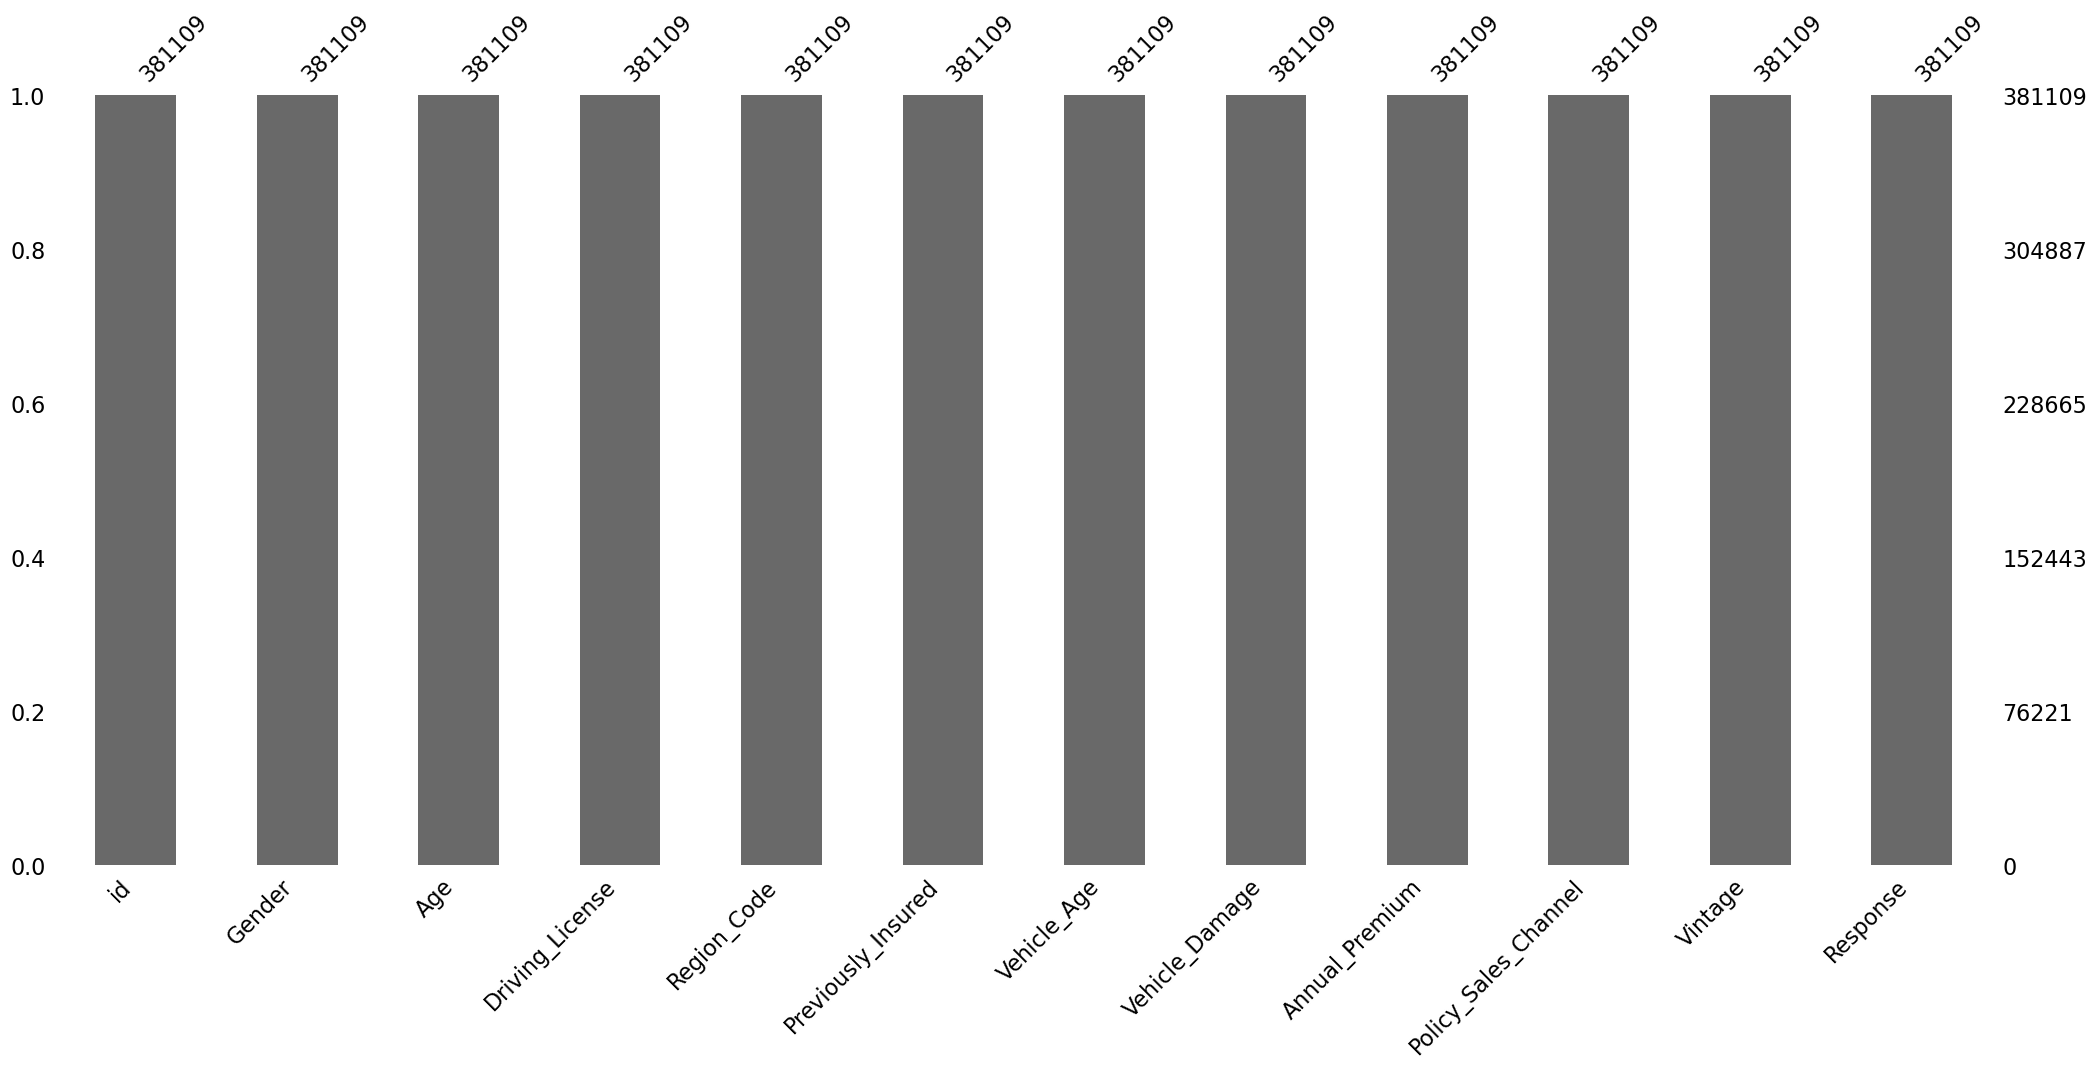

In [11]:
# Let's visualize the missing points using barplot
msno.bar(data_frame)

<br></br>
<h2><b> Feature Engineering </b></h2>

In [12]:
# Let's get the numerical columns corresponding to the australian rain dataframe
numerical_columns = data_frame.select_dtypes(exclude=["object"]).columns.tolist()

# Let's get the categorical columns corresponding to the australian rain dataframe
categorical_columns = data_frame.select_dtypes(include=["object"]).columns.tolist()

<br></br>
### OneHot Encoding

In [15]:
# # Function to convert categorical data into a numerical format,
# # in which a sparse matrix of 0's and 1's is returned.


# def one_hot_encoding(data):
#     # Get's unique categories and their value counts
#     categories, counts = np.unique(data, return_counts=True)

#     # Creates an empty array with the shape of (n_samples, n_categories)
#     onehot_encoded = np.zeros((len(data), len(categories)))

#     # Fill's the array with ones where the category matches the sample
#     for i, category in enumerate(categories):
#         onehot_encoded[data == category, i] = 1

#     # Returns the oneencoded array
#     return onehot_encoded

### Frequency Encoding

In [16]:
# Function to to convert categorical data into numerical values
# based on the frequency of each category in the dataset


def frequency_encoding(categorical_series):
    # Get's the value counts of distinct labels present in categorical_series
    counts = categorical_series.value_counts()
    # Computes and returns the frequency encoding values
    return categorical_series.map(counts) / len(categorical_series)

### Conversion of categorical features into numerical features

In [17]:
# Let's remove the date column from dataframe as it is of no use for the model to learn
data_frame.drop(["id"], axis=1, inplace=True)
numerical_columns.remove("id")
# Iterates over all the categorical columns and applies one-hot encoding to each column
for categorical_column in categorical_columns:
    if categorical_column == "Gender":
        data_frame[categorical_column] = data_frame.loc[:, categorical_column].map(
            {"Male": 1, "Female": 0}
        )
    elif categorical_column == "Vehicle_Age":
        data_frame[categorical_column] = data_frame.loc[:, categorical_column].map(
            {"1-2 Year": 0, "< 1 Year": 1, "> 2 Years": 2}
        )
    elif categorical_column == "Vehicle_Damage":
        data_frame[categorical_column] = data_frame.loc[:, categorical_column].map(
            {"Yes": 1, "No": 0}
        )

#### Let's see if any column dtype is of "Object"

In [18]:
# Let's see the data types of all the columns after conversion to numerical features
data_frame.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

<br></br>
<b><h2> Data Normalization </h2></b>

In [19]:
# Function to normalize the values of each column by subtracting
# the mean and dividing by the standard deviation


def z_score_normalization(column_name):
    series = data_frame.loc[:, column_name]
    return (series - series.mean()) / series.std()

In [20]:
# Iterates over all the continuous columns and applies z_score_normalization to each column
for column_name in numerical_columns:
    if column_name != "Response":
        data_frame[column_name] = z_score_normalization(column_name=column_name)

#### Descriptive statisctics after normalization

In [21]:
# Let's see descriptive statistics for all numeric columns after normalization
data_frame.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,3.811090e+05,3.811090e+05,3.811090e+05,3.811090e+05,381109.000000,381109.000000,3.811090e+05,3.811090e+05,3.811090e+05,381109.000000
mean,0.540761,-2.333097e-16,-4.421982e-16,4.653972e-16,-1.273769e-15,0.516388,0.504877,-1.079800e-15,-1.765703e-15,-5.565608e-17,0.122563
std,0.498336,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.577698,0.499977,1.000000e+00,1.000000e+00,1.000000e+00,0.327936
min,0.000000,-1.213451e+00,-2.164128e+01,-1.994636e+00,-9.196368e-01,0.000000,0.000000,-1.622851e+00,-2.048452e+00,-1.725172e+00,0.000000
25%,0.000000,-8.911121e-01,4.620787e-02,-8.608393e-01,-9.196368e-01,0.000000,0.000000,-3.578304e-01,-1.531885e+00,-8.646620e-01,0.000000
50%,1.000000,-1.819659e-01,4.620787e-02,1.217843e-01,-9.196368e-01,0.000000,1.000000,6.417246e-02,3.867926e-01,-4.151921e-03,0.000000
75%,1.000000,6.561160e-01,4.620787e-02,6.508893e-01,1.087383e+00,1.000000,1.000000,5.133057e-01,7.373203e-01,8.683097e-01,0.000000
max,1.000000,2.976958e+00,4.620787e-02,1.935859e+00,1.087383e+00,2.000000,1.000000,2.960530e+01,9.402574e-01,1.728820e+00,1.000000


#### Distributions

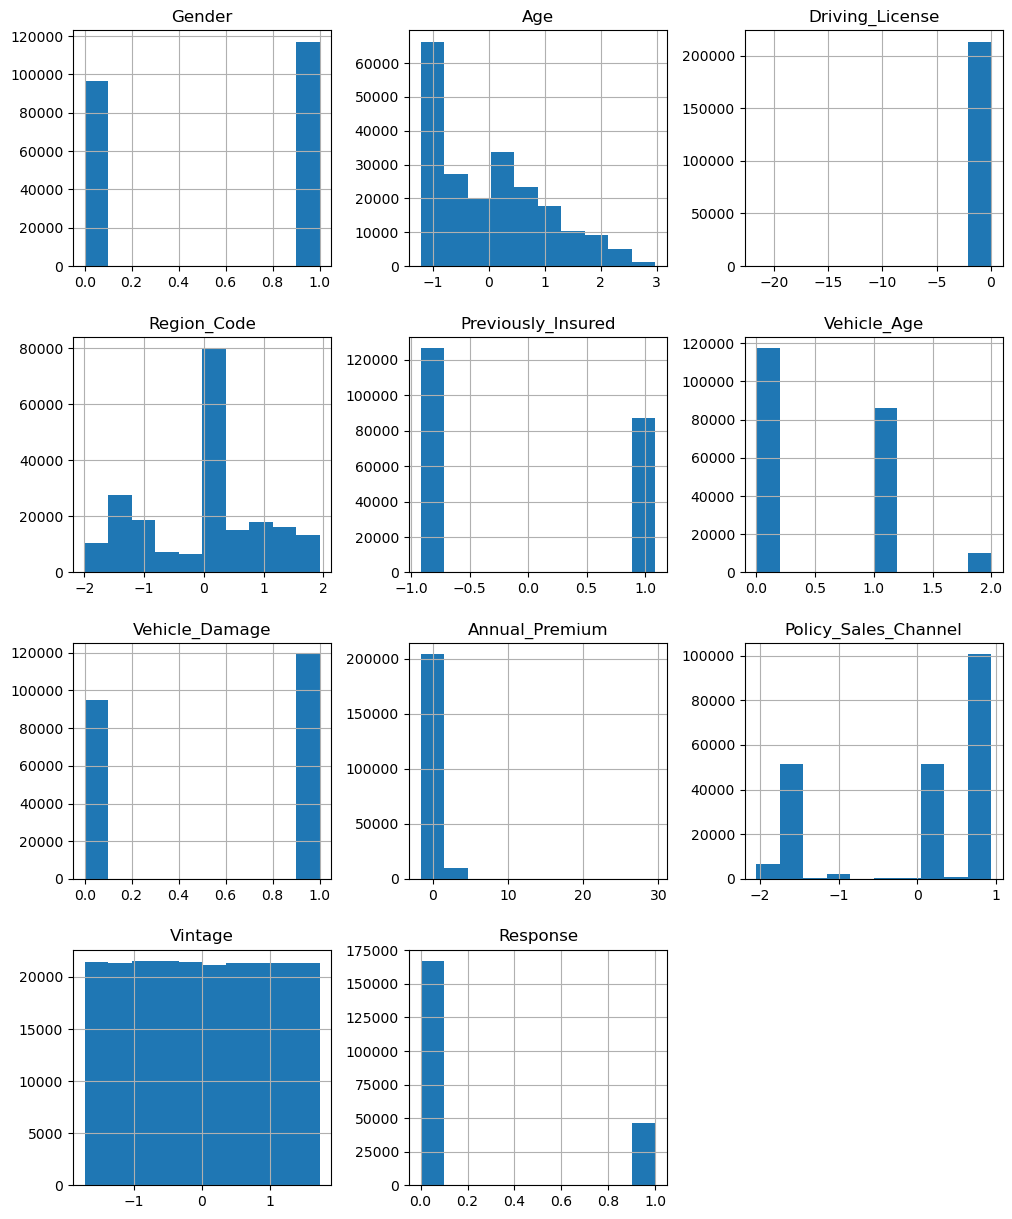

In [32]:
# # Let's confirm that all values in a dataframe are within the range of 0 to 1 using boxplots


data_frame.hist(figsize=(12,15))
plt.show()
    

# Let's remove empty subplot
# figure.delaxes(axis[nrow_plots - 1][ncol_plots - 1])

<br></br>
<h2><b>Data Visualizations(Distributions)</b></h2>

<br></br>
<h2><b>Output Column Distribution</b></h2>

In [24]:
# Let's see the percentage of 0's and 1's in output column(RainTomorrow)
percentage = data_frame.loc[:, "Response"].value_counts(normalize=True) * 100
percentage

0    87.743664
1    12.256336
Name: Response, dtype: float64

#### Pie chart distribution of RainTomorrow label

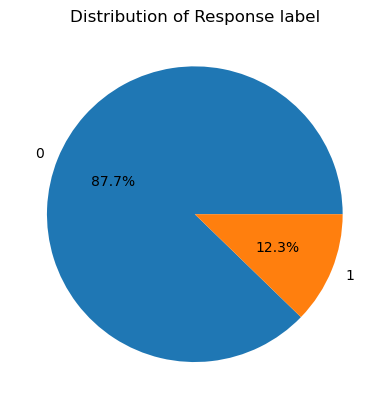

In [33]:
plt.pie(percentage, labels=["0", "1"], autopct="%1.1f%%")
plt.title("Distribution of Response label")
plt.show()

<br></br>
## Phase - 2 Build a model to overfit the entire dataset)

#### Model Building

In [35]:
# Let's create a keras sequential model
model = Sequential()

# Let's add dense layer to the model network
model.add(Dense(16, input_dim=data_frame.shape[1] - 1, activation="relu"))
# model.add(Dense(8, activation = "relu"))
# model.add(Dense(1, activation = "sigmoid"))

#### Model Compilation

In [36]:
# Let's build the model using binary_crossentropy as the loss function 
# and accuracy as the evaluation metric during the compilation process

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

#### Model Training

In [ ]:
# Let's fit the sequential model with input features and output label
model.fit(x=data_frame.iloc[:, :-1].values, y=data_frame.iloc[:, -1].values, epochs=100, verbose=1)

Epoch 1/100
6685/6685 [==============================] - 6s 926us/step - loss: 0.7073 - accuracy: 0.3724
Epoch 2/100
6685/6685 [==============================] - 6s 897us/step - loss: 0.4000 - accuracy: 0.4212
Epoch 3/100
6685/6685 [==============================] - 8s 1ms/step - loss: 0.3955 - accuracy: 0.4304
Epoch 4/100
6685/6685 [==============================] - 12s 2ms/step - loss: 0.3952 - accuracy: 0.4552
Epoch 5/100
6685/6685 [==============================] - 12s 2ms/step - loss: 0.3954 - accuracy: 0.4199
Epoch 6/100
6685/6685 [==============================] - 11s 2ms/step - loss: 0.3960 - accuracy: 0.4393
Epoch 7/100
6685/6685 [==============================] - 11s 2ms/step - loss: 0.3959 - accuracy: 0.4294
Epoch 8/100
6685/6685 [==============================] - 10s 2ms/step - loss: 0.3958 - accuracy: 0.4343
Epoch 9/100
6685/6685 [==============================] - 11s 2ms/step - loss: 0.3945 - accuracy: 0.4373
Epoch 10/100
6685/6685 [==============================] - 11s 2

In [28]:
# # Let's drop few rows correspond to RainTomorrow label "0" from dataframe
# label_counts = data_frame["Response"].value_counts()

# # Let's find the label value that has the highest count
# max_count_label = label_counts.idxmax()

# # Select a specified percentage of rows in the dataframe that have the max_count_label value
# percentage_to_drop = 0.5  # Let's drop 50% of rows
# rows_to_drop = data_frame[(data_frame["Response"] == max_count_label)].sample(frac=percentage_to_drop)

# # Drop the selected rows from the dataframe
# data_frame.drop(rows_to_drop.index, inplace=True)